<a href="https://colab.research.google.com/github/vitorbarbosa123/reconhecimento-textos-ocr/blob/master/Reconhecimento_de_texto_com_OCR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python==4.6.0 (from versions: 3.4.0.14, 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68)
ERROR: No matching distribution found for opencv-python==4.6.0
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and

In [2]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-por is already the newest version (1:4.00~git30-7274cfa-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [3]:
! git clone https://github.com/sthemonica/text-recognize

fatal: destination path 'text-recognize' already exists and is not an empty directory.


In [4]:
import pytesseract
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow

In [5]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2023-02-19 23:19:45--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2023-02-19 23:19:46--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2023-02-19 23:19:46--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, a

In [6]:
!mkdir tessdata

mkdir: cannot create directory ‘tessdata’: File exists


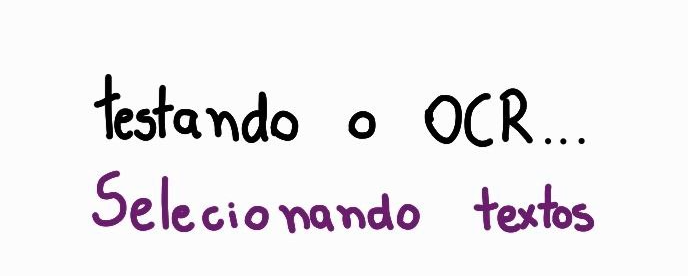

In [7]:
img = cv2.imread('/content/text-recognize/Imagens/Aula3-testando.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)


In [8]:
from pytesseract import Output

In [9]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, lang='por', config=config_tesseract, output_type=Output.DICT)
# DICT - retorna um "dicionário" do que ele leu na imagem
resultado

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2],
 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474],
 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184],
 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120],
 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49],
 'conf': ['-1', '-1', '-1', '-1', 63, 90, 48, '-1', 85, 77],
 'text': ['',
  '',
  '',
  '',
  'Testando',
  'o',
  'OCR..',
  '',
  'Selecionando',
  'textos']}



    block_num = Número do bloco atual. Quando o tesseract faz o OCR, ele divide a imagem em várias regiões, o que pode variar de acordo com os parametros do PSM e também outros critérios próprios do algoritmo. Cada bloco é uma região

    conf = confiança da predição (de 0 a 100. -1 significa que não foi reconhecido texto)

    height = altura do bloco de texto detectada (ou seja, da caixa delimitadora)

    left = coordenada x onde inicia a caixa delimitadora

    level = o level (nível) corresponde à categoria do bloco detectado. são 5 valores possiveis:
        página
        bloco
        parágrafo
        linha
        palavra

Portanto, se foi retornado o valor 5 significa que o bloco detectado é texto, se foi 4 significa que o que foi detectado é uma linha

    line_num = número da linha do que foi detectado (inicia com 0)

    page_num = o índice da página onde o item foi detectado. Na maioria dos casos sempre haverá uma página só

    text = o resultado do reconhecimento

    top = coordenada y onde a caixa delimitadora começa

    width = largura do bloco de texto atual detectado

    word_num = numero da palavra (indice) dentro do bloco atual



In [10]:
min_conf = 40 #@param {type: 'slider', min: '0', max: '100'}

In [11]:
def caixa_texto(resultado, img, cor = (255,100,0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x,y), (x+w,y+h), cor, 2)
  # 2 - borda

  return x,y, img

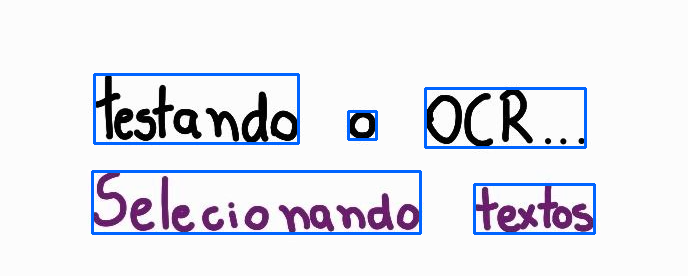

In [12]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

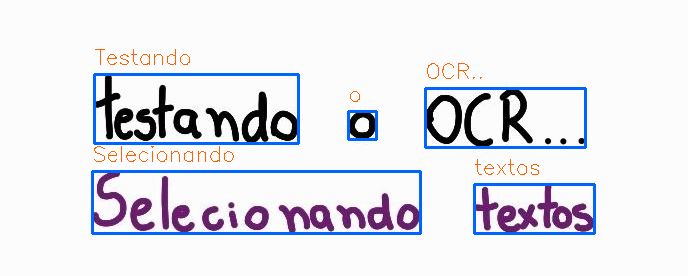

In [13]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,100,255))
cv2_imshow(img_copia)

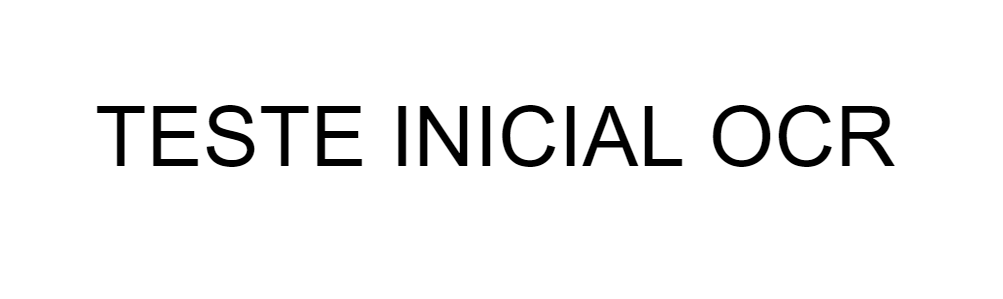

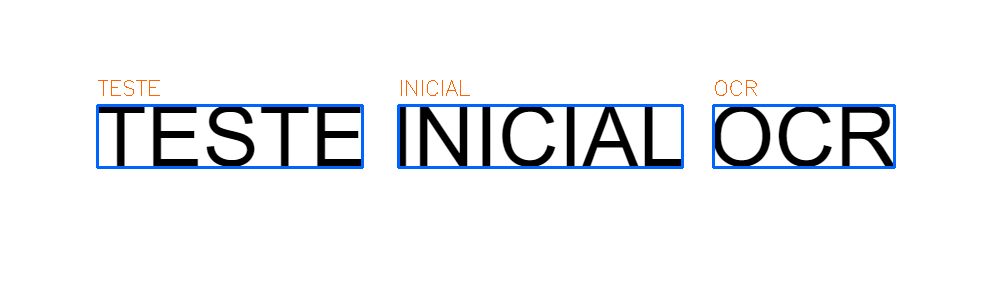

In [14]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-teste.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, lang='por', config=config_tesseract, output_type=Output.DICT)
min_conf = 80

img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,100,255))
cv2_imshow(img_copia)

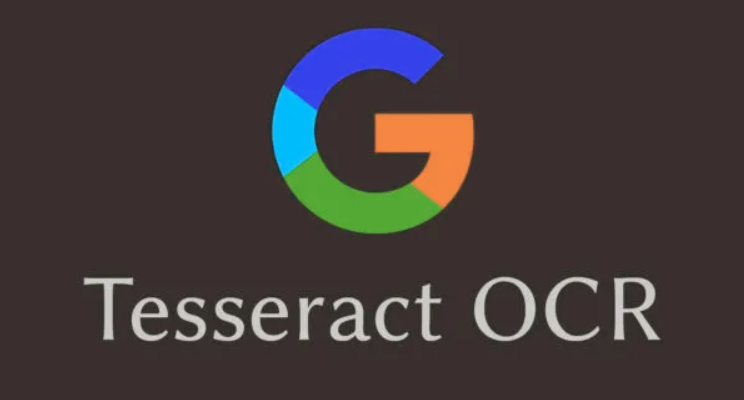

In [17]:
# Trabalhando com fontes externas
img = cv2.imread('/content/text-recognize/Imagens/Aula1-ocr.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, lang='por', config=config_tesseract, output_type=Output.DICT)
min_conf = 80

from PIL import ImageFont, ImageDraw, Image
fonte = "/content/text-recognize/Imagens/calibri.ttf"

### x,y - posições
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte)
  img = np.array(img_pil)
  return img

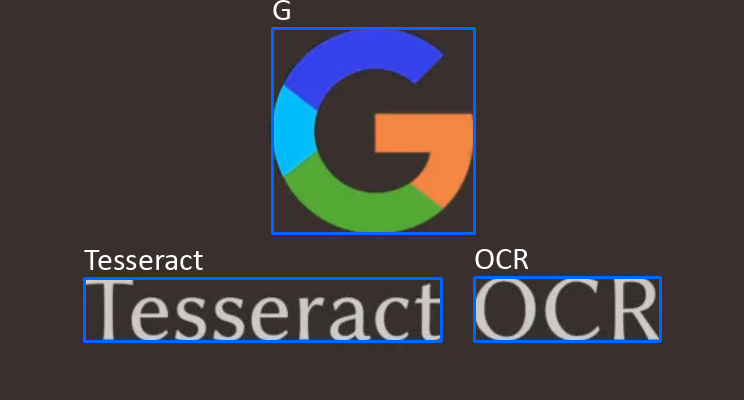

In [18]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    
    texto = resultado['text'][i]
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)
cv2_imshow(img_copia)

## Salvando Imagens tratadas

In [19]:
import os 
os.makedirs('images_tesseract', exist_ok=True)

logo_tesseract = '/content/images_tesseract/logo_tesseract.png'
cv2.imwrite(logo_tesseract, img_copia)

True